# 7. 깔끔한 데이터

## 열과 피벗

### 넓은 데이터

데이터프레임의 열은 파이썬의 변수와 비슷한 역할.

데이터프레임의 열이 옆으로 길게 늘어선 형태가 된다.

melt 메서드를 자주 사용하게 된다.

melt 메서드는 지정한 열의 데이터를 모두 행으로 정리해준다.

id_vars, value_vars 가 중요.

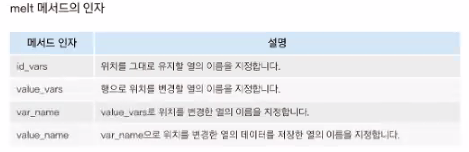

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/pew.csv')

In [3]:
df.head(2)

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76


In [4]:
df.tail(2)

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
16,Other World Religions,5,2,3,4,2,7,3,4,4,8
17,Unaffiliated,217,299,374,365,341,528,407,321,258,597


- melt 에 사용될 내용 (클릭)

Signature:
pd.melt(
    frame: 'DataFrame',
    id_vars=None,
    value_vars=None,
    var_name=None,
    value_name='value',
    col_level=None,
    ignore_index: 'bool' = True, #(인덱스 값을 기본 유지 안하고 새로 부여해준다)
) -> 'DataFrame'

In [5]:
# var_name='',value_name='' 여기에 원하는 이름 입력하면 컬럼명이 바뀜
# id_vars='religion' 이건 출력할 내용에 유지하고 싶은 내용 적은 것이다.
# 이렇게 적어서 원하는걸 포함하면서 새로운 내용 추가해서 표를 표현할 수 있다.
data = pd.melt(df,id_vars='religion',var_name='income',value_name='count')

In [6]:
data.head(2)

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12


In [7]:
# data.columns 검색해서 나온 컬럼명들 보여줌 
# 리스트에 변경하고 싶은 이름 넣어서 변경하는 과정
data.columns = ['religion', 'income', 'count']

In [8]:
data.sample()

,religion,income,count
120,Muslim,$75-100k,16


- rename 참고내용

Signature:
data.rename(
    mapper: 'Renamer | None' = None,
    *,
    index: 'Renamer | None' = None,
    columns: 'Renamer | None' = None,
    axis: 'Axis | None' = None,
    copy: 'bool' = True,
    inplace: 'bool' = False,
    level: 'Level | None' = None,
    errors: 'str' = 'ignore',
) -> 'DataFrame | None'

- 칼럼 입력 방법

.rename(columns={"A": "a", "B": "c"})

In [9]:
# rename으로 칼럼 이름 바꿔줌
data.rename(columns={"income": "소득영역", "count": "갯수"})

,religion,소득영역,갯수
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [10]:
df = pd.read_csv('data/billboard.csv')

In [11]:
df.head(1)

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


이 df에서 합칠 수 있는 시리즈들을 합쳐 본다. 

같은 칼럼들을 합쳐야하므로 wk1	wk2	wk3	wk4	wk5	...

이 부분이 적절하겠다.

In [12]:
df.columns

Index(['year', 'artist', 'track', 'time', 'date.entered', 'wk1', 'wk2', 'wk3',
       'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9', 'wk10', 'wk11', 'wk12',
       'wk13', 'wk14', 'wk15', 'wk16', 'wk17', 'wk18', 'wk19', 'wk20', 'wk21',
       'wk22', 'wk23', 'wk24', 'wk25', 'wk26', 'wk27', 'wk28', 'wk29', 'wk30',
       'wk31', 'wk32', 'wk33', 'wk34', 'wk35', 'wk36', 'wk37', 'wk38', 'wk39',
       'wk40', 'wk41', 'wk42', 'wk43', 'wk44', 'wk45', 'wk46', 'wk47', 'wk48',
       'wk49', 'wk50', 'wk51', 'wk52', 'wk53', 'wk54', 'wk55', 'wk56', 'wk57',
       'wk58', 'wk59', 'wk60', 'wk61', 'wk62', 'wk63', 'wk64', 'wk65', 'wk66',
       'wk67', 'wk68', 'wk69', 'wk70', 'wk71', 'wk72', 'wk73', 'wk74', 'wk75',
       'wk76'],
      dtype='object')

In [13]:
# 유지할 부분 적어주고, 나머지 부분들 합쳐줌.
df_melt = pd.melt(df,
        id_vars=['year', 'artist', 'track', 'time', 'date.entered'],
        var_name='week',
        value_name='rating')

In [14]:
df.shape

(317, 81)

In [15]:
df_melt.shape

(24092, 7)

## 열 이름 관리하기

### 하나의 열이 여러 의미를 가지고 있는 경우

분리해주는 작업이 필요함.

In [16]:
df = pd.read_csv('data/country_timeseries.csv')

In [17]:
df.sample()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
116,3/28/2014,6,112.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,70.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN


#### (1) melt로 칼럼 정리

In [18]:
df_melt = pd.melt(df,id_vars=['Date','Day'])

`df_melt.` 사용시 참고

- API나 다른 자료 참고 할때 데이터 타입이나 함수, 메서드 사용법과 표기법 참고해가면서 작업해야한다.

- [파이썬 사용법(표기법) 참고 주소](https://docs.python.org/3/library/stdtypes.html#text-sequence-type-str)

In [19]:
df_melt.sample(3)

,Date,Day,variable,value
72,7/20/2014,120,Cases_Guinea,415.0
1131,10/22/2014,214,Deaths_Liberia,NaN
924,7/27/2014,126,Cases_Mali,NaN


In [20]:
# variable 칼럼만 빼고 싶을 때
df_melt['status'] = df_melt.variable.str.split('_').str.get(0)

In [21]:
df_melt['country'] = df_melt.variable.str.split('_').str.get(1)

In [22]:
df_melt.sample(3)

,Date,Day,variable,value,status,country
1503,10/12/2014,204,Deaths_Senegal,0.0,Deaths,Senegal
1101,1/2/2015,286,Deaths_Liberia,3496.0,Deaths,Liberia
1806,5/1/2014,40,Deaths_Spain,NaN,Deaths,Spain


# 열을 하나로 정리하기

### 기상 데이터의 여러 열을 하나로 정리하기 (melt, pivot, table 메서드)

In [23]:
df = pd.read_csv('data/weather.csv')

In [24]:
df.head(5)

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 하나로 합쳐주는 작업

In [25]:
df.columns

Index(['id', 'year', 'month', 'element', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6',
       'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15', 'd16',
       'd17', 'd18', 'd19', 'd20', 'd21', 'd22', 'd23', 'd24', 'd25', 'd26',
       'd27', 'd28', 'd29', 'd30', 'd31'],
      dtype='object')

In [26]:
df_melt = pd.melt(df,
        id_vars=['id','year','month','element'],
        var_name='day',
        value_name='temp')

In [27]:
df_pivot = df_melt.pivot_table(index=['id','year','month','day'],
                               columns='element',
                               values='temp')

- 주피터 단축키 참고할 링크
- [단축키 참고 링크](https://taptorestart.tistory.com/entry/Jupyter-Notebook-%EC%A3%BC%ED%94%BC%ED%84%B0-%EB%85%B8%ED%8A%B8%EB%B6%81-%EB%8B%A8%EC%B6%95%ED%82%A4shortcuts-%EC%A0%95%EB%A6%AC)

In [28]:
df_pivot.index

MultiIndex([('MX17004', 2010,  1, 'd30'),
            ('MX17004', 2010,  2, 'd11'),
            ('MX17004', 2010,  2,  'd2'),
            ('MX17004', 2010,  2, 'd23'),
            ('MX17004', 2010,  2,  'd3'),
            ('MX17004', 2010,  3, 'd10'),
            ('MX17004', 2010,  3, 'd16'),
            ('MX17004', 2010,  3,  'd5'),
            ('MX17004', 2010,  4, 'd27'),
            ('MX17004', 2010,  5, 'd27'),
            ('MX17004', 2010,  6, 'd17'),
            ('MX17004', 2010,  6, 'd29'),
            ('MX17004', 2010,  7,  'd3'),
            ('MX17004', 2010,  7, 'd14'),
            ('MX17004', 2010,  8, 'd23'),
            ('MX17004', 2010,  8,  'd5'),
            ('MX17004', 2010,  8, 'd29'),
            ('MX17004', 2010,  8, 'd13'),
            ('MX17004', 2010,  8, 'd25'),
            ('MX17004', 2010,  8, 'd31'),
            ('MX17004', 2010,  8,  'd8'),
            ('MX17004', 2010, 10,  'd5'),
            ('MX17004', 2010, 10, 'd14'),
            ('MX17004', 2010, 10, 

In [29]:
df_pivot.columns

Index(['tmax', 'tmin'], dtype='object', name='element')

In [30]:
df_pivot.values

array([[27.8, 14.5],
       [29.7, 13.4],
       [27.3, 14.4],
       [29.9, 10.7],
       [24.1, 14.4],
       [34.5, 16.8],
       [31.1, 17.6],
       [32.1, 14.2],
       [36.3, 16.7],
       [33.2, 18.2],
       [28. , 17.5],
       [30.1, 18. ],
       [28.6, 17.5],
       [29.9, 16.5],
       [26.4, 15. ],
       [29.6, 15.8],
       [28. , 15.3],
       [29.8, 16.5],
       [29.7, 15.6],
       [25.4, 15.4],
       [29. , 17.3],
       [27. , 14. ],
       [29.5, 13. ],
       [28.7, 10.5],
       [31.2, 15. ],
       [28.1, 12.9],
       [31.3, 16.3],
       [26.3,  7.9],
       [27.7, 14.2],
       [28.1, 12.1],
       [27.2, 12. ],
       [29.9, 13.8],
       [27.8, 10.5]])

In [31]:
df_pivot.reset_index(inplace=True)

In [32]:
df_pivot.index

RangeIndex(start=0, stop=33, step=1)

In [33]:
df_pivot.values

array([['MX17004', 2010, 1, 'd30', 27.8, 14.5],
       ['MX17004', 2010, 2, 'd11', 29.7, 13.4],
       ['MX17004', 2010, 2, 'd2', 27.3, 14.4],
       ['MX17004', 2010, 2, 'd23', 29.9, 10.7],
       ['MX17004', 2010, 2, 'd3', 24.1, 14.4],
       ['MX17004', 2010, 3, 'd10', 34.5, 16.8],
       ['MX17004', 2010, 3, 'd16', 31.1, 17.6],
       ['MX17004', 2010, 3, 'd5', 32.1, 14.2],
       ['MX17004', 2010, 4, 'd27', 36.3, 16.7],
       ['MX17004', 2010, 5, 'd27', 33.2, 18.2],
       ['MX17004', 2010, 6, 'd17', 28.0, 17.5],
       ['MX17004', 2010, 6, 'd29', 30.1, 18.0],
       ['MX17004', 2010, 7, 'd3', 28.6, 17.5],
       ['MX17004', 2010, 7, 'd14', 29.9, 16.5],
       ['MX17004', 2010, 8, 'd23', 26.4, 15.0],
       ['MX17004', 2010, 8, 'd5', 29.6, 15.8],
       ['MX17004', 2010, 8, 'd29', 28.0, 15.3],
       ['MX17004', 2010, 8, 'd13', 29.8, 16.5],
       ['MX17004', 2010, 8, 'd25', 29.7, 15.6],
       ['MX17004', 2010, 8, 'd31', 25.4, 15.4],
       ['MX17004', 2010, 8, 'd8', 29.0, 17.3]

In [34]:
df = pd.read_csv('data/billboard.csv')

In [35]:
df.sample()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
67,2000,DMX,Party Up (Up In Here...,3:45,2000-02-26,88,74.0,62.0,56.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.columns

Index(['year', 'artist', 'track', 'time', 'date.entered', 'wk1', 'wk2', 'wk3',
       'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9', 'wk10', 'wk11', 'wk12',
       'wk13', 'wk14', 'wk15', 'wk16', 'wk17', 'wk18', 'wk19', 'wk20', 'wk21',
       'wk22', 'wk23', 'wk24', 'wk25', 'wk26', 'wk27', 'wk28', 'wk29', 'wk30',
       'wk31', 'wk32', 'wk33', 'wk34', 'wk35', 'wk36', 'wk37', 'wk38', 'wk39',
       'wk40', 'wk41', 'wk42', 'wk43', 'wk44', 'wk45', 'wk46', 'wk47', 'wk48',
       'wk49', 'wk50', 'wk51', 'wk52', 'wk53', 'wk54', 'wk55', 'wk56', 'wk57',
       'wk58', 'wk59', 'wk60', 'wk61', 'wk62', 'wk63', 'wk64', 'wk65', 'wk66',
       'wk67', 'wk68', 'wk69', 'wk70', 'wk71', 'wk72', 'wk73', 'wk74', 'wk75',
       'wk76'],
      dtype='object')

In [37]:
df_melt = pd.melt(df,
        id_vars=['year', 'artist', 'track', 'time', 'date.entered'],
        var_name='week',
        value_name='rating')

In [38]:
df_melt

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


'year', 'artist', 'track', 'time', 'date.entered' 에 대한 칼럼 데이터들이 76번 동안 중복 저장됐다는 뜻이다.

In [39]:
df_melt.shape

(24092, 7)

In [40]:
df.shape, df_melt.shape

((317, 81), (24092, 7))

In [41]:
df_melt[df_melt.track == 'Loser']

,year,artist,track,time,date.entered,week,rating
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
320,2000,3 Doors Down,Loser,4:24,2000-10-21,wk2,76.0
637,2000,3 Doors Down,Loser,4:24,2000-10-21,wk3,72.0
954,2000,3 Doors Down,Loser,4:24,2000-10-21,wk4,69.0
1271,2000,3 Doors Down,Loser,4:24,2000-10-21,wk5,67.0
...,...,...,...,...,...,...,...
22510,2000,3 Doors Down,Loser,4:24,2000-10-21,wk72,NaN
22827,2000,3 Doors Down,Loser,4:24,2000-10-21,wk73,NaN
23144,2000,3 Doors Down,Loser,4:24,2000-10-21,wk74,NaN
23461,2000,3 Doors Down,Loser,4:24,2000-10-21,wk75,NaN


- 76번 중복되는걸 분리 시켜보자

In [42]:
df_songs = df_melt[['year', 'artist', 'track', 'time']]

In [43]:
df_songs.shape

(24092, 4)

In [44]:
# 중복되는거 빼기
# 원본에도 적용하는 명령
df_songs.drop_duplicates(inplace=True)
# 오류나긴하지만 줄어드는건 적용됨.

C:\Users\user\AppData\Local\Temp\ipykernel_1656\2282842722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_songs.drop_duplicates(inplace=True)


In [45]:
df_songs.shape

(317, 4)

In [46]:
df_songs['id']=range(len(df_songs))
# 오류나지만 적용됨

C:\Users\user\AppData\Local\Temp\ipykernel_1656\1589531331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_songs['id']=range(len(df_songs))


In [47]:
df_songs.head()

,year,artist,track,time,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,1
2,2000,3 Doors Down,Kryptonite,3:53,2
3,2000,3 Doors Down,Loser,4:24,3
4,2000,504 Boyz,Wobble Wobble,3:35,4


In [48]:
df_ratings = df_melt.merge(df_songs,on=['year', 'artist', 'track', 'time'])

In [49]:
#  불필요한거 제거 해서 호출
df_ratings = df_ratings[['id','date.entered','week','rating']]

In [50]:
df_ratings

,id,date.entered,week,rating
0,0,2000-02-26,wk1,87.0
1,0,2000-02-26,wk2,82.0
2,0,2000-02-26,wk3,72.0
3,0,2000-02-26,wk4,77.0
4,0,2000-02-26,wk5,87.0
...,...,...,...,...
24087,316,2000-04-29,wk72,NaN
24088,316,2000-04-29,wk73,NaN
24089,316,2000-04-29,wk74,NaN
24090,316,2000-04-29,wk75,NaN


In [51]:
df_songs

,year,artist,track,time,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,1
2,2000,3 Doors Down,Kryptonite,3:53,2
3,2000,3 Doors Down,Loser,4:24,3
4,2000,504 Boyz,Wobble Wobble,3:35,4
...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,312
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,313
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,314
315,2000,Zombie Nation,Kernkraft 400,3:30,315
